# Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, SimpleRNN, Dense, Embedding, Dropout, Flatten, LSTM
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from tensorflow.keras.utils import plot_model
import time
import warnings
warnings.filterwarnings('ignore')
from tensorflow import keras
from tensorflow.keras import layers
from nltk.corpus import stopwords
import nltk
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import unicodedata
from num2words import num2words


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Nitin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# Data Acquisition

In [2]:
data = pd.read_json('News_Category_Dataset_v3.json', lines=True)
data.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


# Dataset observations as

* Size of the dataset
* What type of data attributes are there?
* What are you classifying?
* Plot the distribution of the categories of the target / label.

Size of the dataset: 209527

Type of data attributes:
link                         object
headline                     object
category                     object
short_description            object
authors                      object
date                 datetime64[ns]
dtype: object

Data attributes: ['link', 'headline', 'category', 'short_description', 'authors', 'date']

Classifying: ['U.S. NEWS' 'COMEDY' 'PARENTING' 'WORLD NEWS' 'CULTURE & ARTS' 'TECH'
 'SPORTS' 'ENTERTAINMENT' 'POLITICS' 'WEIRD NEWS' 'ENVIRONMENT'
 'EDUCATION' 'CRIME' 'SCIENCE' 'WELLNESS' 'BUSINESS' 'STYLE & BEAUTY'
 'FOOD & DRINK' 'MEDIA' 'QUEER VOICES' 'HOME & LIVING' 'WOMEN'
 'BLACK VOICES' 'TRAVEL' 'MONEY' 'RELIGION' 'LATINO VOICES' 'IMPACT'
 'WEDDINGS' 'COLLEGE' 'PARENTS' 'ARTS & CULTURE' 'STYLE' 'GREEN' 'TASTE'
 'HEALTHY LIVING' 'THE WORLDPOST' 'GOOD NEWS' 'WORLDPOST' 'FIFTY' 'ARTS'
 'DIVORCE']


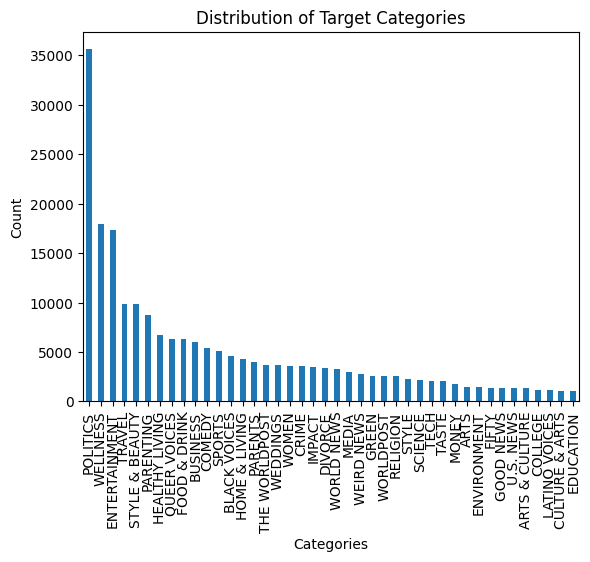

In [3]:
# Size of the dataset
dataset_size = data.shape[0]  # Number of rows in the dataset
print("Size of the dataset:", dataset_size)

# Data attributes and their types
data_attributes = data.dtypes
print("\nType of data attributes:")
print(data_attributes)

# Data attributes
data_attributes = list(data.columns)
print("\nData attributes:", data_attributes)

# Target variable
target_variable = 'category'  # Replace with the actual name of the target column
target_classes = data[target_variable].unique()

# What are you classifying?
print("\nClassifying:", target_classes)

# Plot the distribution of target categories
data[target_variable].value_counts().plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Distribution of Target Categories')
plt.show()


# Plot Obeservation
Above plot shows the data imbalance. To deal with data imbalance we can group by the category

In [4]:
categories = data['category'].value_counts().index

def groupper(grouplist,name):
    for ele in categories:
        if ele in grouplist:
            data.loc[data['category'] == ele, 'category'] = name
            
            
groupper( grouplist= ['WELLNESS', 'HEALTHY LIVING','HOME & LIVING','STYLE & BEAUTY' ,'STYLE'] , name =  'LIFESTYLE AND WELLNESS')

groupper( grouplist= [ 'PARENTING', 'PARENTS' ,'EDUCATION' ,'COLLEGE'] , name =  'PARENTING AND EDUCATION')

groupper( grouplist= ['SPORTS','ENTERTAINMENT' , 'COMEDY','WEIRD NEWS','ARTS'] , name =  'SPORTS AND ENTERTAINMENT')

groupper( grouplist= ['TRAVEL', 'ARTS & CULTURE','CULTURE & ARTS','FOOD & DRINK', 'TASTE'] , name =  'TRAVEL-TOURISM & ART-CULTURE')

groupper( grouplist= ['WOMEN','QUEER VOICES', 'LATINO VOICES', 'BLACK VOICES'] , name =  'EMPOWERED VOICES')

groupper( grouplist= ['BUSINESS' ,  'MONEY'] , name =  'BUSINESS-MONEY')

groupper( grouplist= ['THE WORLDPOST' , 'WORLDPOST' , 'WORLD NEWS', 'U.S. NEWS'] , name =  'WORLDNEWS')

groupper( grouplist= ['ENVIRONMENT' ,'GREEN'] , name =  'ENVIRONMENT')

groupper( grouplist= ['TECH', 'SCIENCE'] , name =  'SCIENCE AND TECH')

groupper( grouplist= ['FIFTY' , 'IMPACT' ,'GOOD NEWS','CRIME'] , name =  'GENERAL')

groupper( grouplist= ['WEDDINGS', 'DIVORCE',  'RELIGION','MEDIA'] , name =  'MISC')

print("We have a total of {} categories now".format(data['category'].nunique()))
data['category'].value_counts()

# # Plot the distribution of target categories
# data[target_variable].value_counts().plot(kind='bar')
# plt.xlabel('Categories')
# plt.ylabel('Count')
# plt.title('Distribution of Target Categories')
# plt.show()


We have a total of 12 categories now


category
LIFESTYLE AND WELLNESS          41027
POLITICS                        35602
SPORTS AND ENTERTAINMENT        32125
TRAVEL-TOURISM & ART-CULTURE    20749
EMPOWERED VOICES                15632
PARENTING AND EDUCATION         14904
MISC                            12600
WORLDNEWS                       10919
GENERAL                          9845
BUSINESS-MONEY                   7748
SCIENCE AND TECH                 4310
ENVIRONMENT                      4066
Name: count, dtype: int64

# Applied pre-processing techiniques as:

* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies
* Encode categorical data
* Normalize the data
* Feature Engineering
* Stop word removal, lemmatiation, stemming, vectorization

In [5]:
# Check for duplicate data
print("Number of duplicate rows before preprocessing:", data.duplicated().sum())

# Remove duplicate data
data.drop_duplicates(inplace=True)

# Check for missing data
print("Number of missing values before preprocessing:")
print(data.isnull().sum())

# Impute or remove missing data
# Option 1: Remove rows with missing values
data.dropna(inplace=True)

# Option 2: Impute missing values with mean or median
# Uncomment the following lines to use mean imputation
# data.fillna(data.mean(), inplace=True)

# Option 3: Impute missing values with mode (for categorical variables)
# Uncomment the following lines to use mode imputation
# data.fillna(data.mode().iloc[0], inplace=True)

# Check for data inconsistencies and perform necessary corrections
# Option 1: Manual correction based on specific rules
# Uncomment the following lines and modify as per your requirements
# data['column_name'] = data['column_name'].apply(lambda x: x.replace('incorrect_value', 'correct_value'))

# Option 2: Use regular expressions for pattern matching and correction
# Uncomment the following lines and modify as per your requirements
# import re
# data['column_name'] = data['column_name'].apply(lambda x: re.sub(r'pattern', 'replacement', x))

# Check the preprocessed dataset
print("Number of duplicate rows after preprocessing:", data.duplicated().sum())
print("Number of missing values after preprocessing:")
print(data.isnull().sum())


Number of duplicate rows before preprocessing: 13
Number of missing values before preprocessing:
link                 0
headline             0
category             0
short_description    0
authors              0
date                 0
dtype: int64
Number of duplicate rows after preprocessing: 0
Number of missing values after preprocessing:
link                 0
headline             0
category             0
short_description    0
authors              0
date                 0
dtype: int64


In [6]:
# As per suggetion using two column
data = data[['headline', 'category']]

In [7]:
# Function for lemmatization
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in text.split()]
    return ' '.join(lemmatized_tokens)

# Function for stemming
def stem_text(text):
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in text.split()]
    return ' '.join(stemmed_tokens)

# Function for vectorization
def vectorize_text(text):
    vectorizer = TfidfVectorizer()
    text_features = vectorizer.fit_transform(text)
    return text_features

# Function for preprocess the text
def preprocess_text(text, lower_case=True, convert_numbers=True, remove_punctuation=True,
                    remove_accents=True, remove_whitespace=True, expand_abbreviations=False,
                    remove_stopwords=True, sparse_terms=[], specific_words=[]):

    # Convert all letters to lower or upper case
    if lower_case:
        text = text.lower()
    else:
        text = text.upper()

    # Converting numbers into words or removing numbers
    if convert_numbers:
        # Replace numbers with their word equivalents using num2words library
        tokens = []
        for word in text.split():
            if word.isdigit():
                word = num2words(int(word))
            tokens.append(word)
        text = ' '.join(tokens)
    else:
        # Remove numbers using regular expression
        text = re.sub(r'\d+', '', text)

    # Removing punctuations, accent marks, and other diacritics
    if remove_punctuation:
        text = re.sub(r'[^\w\s]', '', text)
    if remove_accents:
        text = ''.join(c for c in unicodedata.normalize('NFD', text)
                       if not unicodedata.combining(c))

    # Removing white spaces
    if remove_whitespace:
        text = re.sub(r'\s+', ' ', text.strip())

    # Expanding abbreviations
    if expand_abbreviations:
        abbreviations = {'e.g.': 'for example', 'i.e.': 'that is', 'etc.': 'et cetera'}
        for abbr, expanded in abbreviations.items():
            text = text.replace(abbr, expanded)

    # Removing stop words, sparse terms, and specific words
    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        text = ' '.join(word for word in text.split() if word not in stop_words)
    text = ' '.join(word for word in text.split() if word not in sparse_terms)
    text = ' '.join(word for word in text.split() if word not in specific_words)

    return text


# Apply the preprocessing function to a specific column
text_col = 'headline'  # Specify the text column to preprocess
data['text'] = data[text_col].apply(preprocess_text)

# Apply lemmatization to a specific column
text_col = 'text'  # Specify the text column to preprocess
data[text_col] = data[text_col].apply(lemmatize_text)

# # Apply stemming to a specific column
# text_col = 'text'  # Specify the text column to preprocess
# data[text_col] = data[text_col].apply(stem_text)

# # Apply vectorization to a specific column
# text_col = 'text'  # Specify the text column to preprocess
# text_features = vectorize_text(data[text_col])

# Check the preprocessed dataset and vectorized features
display(data.head())

# display(text_features.toarray())
start_time = time.time()
# # Save the preprocessed dataset
data.to_csv('preprocessed_Dataset.csv', index=False)

end_time = time.time() - start_time
print("Time taken for text preprocessing: ", end_time)

,headline,category,text
0,Over 4 Million Americans Roll Up Sleeves For O...,WORLDNEWS,four million american roll sleeve omicrontarge...
1,"American Airlines Flyer Charged, Banned For Li...",WORLDNEWS,american airline flyer charged banned life pun...
2,23 Of The Funniest Tweets About Cats And Dogs ...,SPORTS AND ENTERTAINMENT,twentythree funniest tweet cat dog week sept 1723
3,The Funniest Tweets From Parents This Week (Se...,PARENTING AND EDUCATION,funniest tweet parent week sept 1723
4,Woman Who Called Cops On Black Bird-Watcher Lo...,WORLDNEWS,woman called cop black birdwatcher loses lawsu...


Time taken for text preprocessing:  0.6760261058807373


# Identify the target variables

* Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.

In [8]:
# Preprocessing: Convert the labels to numeric values
label_encoder = LabelEncoder()
data['category'] = label_encoder.fit_transform(data['category'])
classes = list(label_encoder.classes_)
print(classes)

# Preprocessing: Split the dataset into input features and labels
X = data['text']
y = data['category']

['BUSINESS-MONEY', 'EMPOWERED VOICES', 'ENVIRONMENT', 'GENERAL', 'LIFESTYLE AND WELLNESS', 'MISC', 'PARENTING AND EDUCATION', 'POLITICS', 'SCIENCE AND TECH', 'SPORTS AND ENTERTAINMENT', 'TRAVEL-TOURISM & ART-CULTURE', 'WORLDNEWS']


# Split the data into training set and testing set

In [9]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (167611,)
y_train shape: (167611,)
X_test shape: (41903,)
y_test shape: (41903,)


# LSTM  Model

In [10]:
# Tokenization and vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()

# Padding sequences
max_sequence_length = X_train.shape[1]

# Reshape the input data to be 3-dimensional (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Define the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(1, max_sequence_length)))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
print(model.summary())

# Define early stopping
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

# Train the model with early stopping
model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Generate predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 128)            2626048   
                                                                 
 dropout (Dropout)           (None, 1, 128)            0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 12)                780       
                                                                 
Total params: 2,676,236
Trainable params: 2,676,236
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/3
5238/5238 [====================

# Bidirectional LSTM Model

In [12]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenization and vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()

# Padding sequences
max_sequence_length = X_train.shape[1]

# Reshape the input data to be 3-dimensional (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Define the LSTM model with Bidirectional layer
model = Sequential()
model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(1, max_sequence_length)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.2))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
print(model.summary())

# Define early stopping
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

# Train the model with early stopping
model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Generate predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 1, 256)           5252096   
 l)                                                              
                                                                 
 dropout_2 (Dropout)         (None, 1, 256)            0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 12)                1548      
                                                                 
Total params: 5,417,996
Trainable params: 5,417,996
No

# RNN Model

In [13]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenization and vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()

# Padding sequences
max_sequence_length = X_train.shape[1]

# Reshape the input data to be 3-dimensional (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Define the RNN model
model = Sequential()
model.add(SimpleRNN(128, return_sequences=True, input_shape=(1, max_sequence_length)))
model.add(Dropout(0.2))
model.add(SimpleRNN(64))
model.add(Dropout(0.2))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
print(model.summary())

# Define early stopping
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

# Train the model with early stopping
model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Generate predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1, 128)            656512    
                                                                 
 dropout_4 (Dropout)         (None, 1, 128)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                12352     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 12)                780       
                                                                 
Total params: 669,644
Trainable params: 669,644
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
5238/5238 [======================

# Bidirectioanl RNN model

In [14]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenization and vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()

# Padding sequences
max_sequence_length = X_train.shape[1]

# Reshape the input data to be 3-dimensional (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Define the Bidirectional RNN model
model = Sequential()
model.add(Bidirectional(SimpleRNN(128, return_sequences=True), input_shape=(1, max_sequence_length)))
model.add(Dropout(0.2))
model.add(Bidirectional(SimpleRNN(64)))
model.add(Dropout(0.2))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
print(model.summary())

# Define early stopping
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

# Train the model with early stopping
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Generate predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 1, 256)           1313024   
 nal)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 1, 256)            0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              41088     
 nal)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 12)                1548      
                                                                 
Total params: 1,355,660
Trainable params: 1,355,660
No

# Insights on the performance of the model and ways to improve it

1. Performance:
* The models are able to classify the news. LSTM and Bidirectional LSTM model accuracy is 65% and RNN and Bidirectional RNN accuracy is 64%
* Generated a classification report on test dataset.

2. Improvements:
* Try different network architectures: Besides the bidirectional LSTM, need to explore other network architectures such as CNN-LSTM or Transformer-based models. These architectures might capture different aspects of the text data and potentially improve the accuracy.
* Utilize word embeddings: Instead of relying solely on TF-IDF vectorization, incorporate pre-trained word embeddings (e.g., Word2Vec, GloVe) to represent the input text. Word embeddings can capture more semantic information and improve the model's understanding of the text.
* Handle class imbalance: If there is a class imbalance in the dataset, consider applying techniques such as oversampling, undersampling, or class weights to balance the classes during training. This can help the model learn from all classes equally and improve its accuracy.
* Capture more contextual information: Depending on the nature of the text data, you can explore techniques such as using n-grams, attention mechanisms, or contextual embeddings (e.g., BERT, GPT) to capture more fine-grained contextual information


By implementing these improvements and fine-tuning the model, you can expect better performance and more accurate classification of News.
